<a href="https://colab.research.google.com/github/tuitenrein/Google-Colab/blob/main/IEC_Task_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Check GPU resource

# New Section

In [ ]:
!nvidia-smi

Mon Dec 19 16:15:48 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P0    27W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

#Load Library

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.9.2


# Import the Fashion MNIST dataset
This guide uses the Fashion MNIST dataset which contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels).
Here, 60,000 images are used to train the network and 10,000 images to evaluate how accurately the network learned to classify images. You can access the Fashion MNIST directly from TensorFlow. Import and load the Fashion MNIST data directly from TensorFlow:

In [ ]:
#load fashion_mnist dataset using tf.keras.datasets
fashion_mnist = tf.keras.datasets.fashion_mnist
#using load_data() func to get train_images, train_labels, test_images, test_labels
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Each image is mapped to a single label. Since the class names are not included with the dataset, store them here to use later when plotting the images:

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Explore the data
Let's explore the format of the dataset before training the model. The following shows there are 60,000 images in the training set, with each image represented as 28 x 28 pixels:

In [ ]:
train_images.shape

(60000, 28, 28)

Likewise, there are 60,000 labels in the training set:

In [ ]:
len(train_labels)

60000

There are 10,000 images in the test set. Again, each image is represented as 28 x 28 pixels:

In [ ]:
#print test image shape
test_images.shape

(10000, 28, 28)

And the test set contains 10,000 images labels:

In [ ]:
#print the length of test labels
test_labels.shape

(10000,)

# Preprocess the data
The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

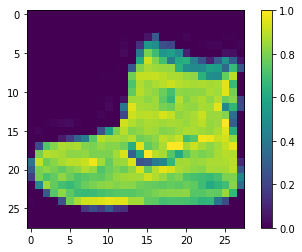

In [ ]:
#using matplotlib to draw a sample train images
plt.figure() #get figure
plt.imshow(train_images[0]) #using imshow to load a sample train image
plt.colorbar() #setup color bar
plt.grid(visible=False) #set grid to false
plt.show()

Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255. It's important that the training set and the testing set be preprocessed in the same way:

In [ ]:
train_images = train_images / 255.0

test_images = test_images / 255.0

To verify that the data is in the correct format and that you're ready to build and train the network, let's display the first 25 images from the training set and display the class name below each image.

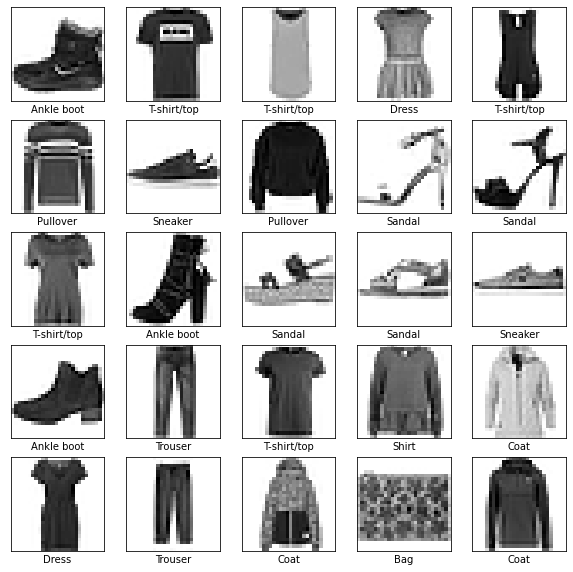

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    #create 25 subplot
    plt.subplot(5,5,i+1)
    #assign xticks and yticks
    plt.xticks([])
    plt.yticks([])
    #show img in each subplot with its class_names
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])   
   
plt.show()

# Build the model
Building the neural network requires configuring the layers of the model, then compiling the model.
### Set up the layers
The basic building block of a neural network is the layer. Layers extract representations from the data fed into them. Hopefully, these representations are meaningful for the problem at hand.

Most of deep learning consists of chaining together simple layers. Most layers, such as tf.keras.layers.Dense, have parameters that are learned during training.

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

The first layer in this network, tf.keras.layers.Flatten, transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.

After the pixels are flattened, the network consists of a sequence of two tf.keras.layers.Dense layers. These are densely connected, or fully connected, neural layers. The first Dense layer has 128 nodes (or neurons). The second (and last) layer returns a logits array with length of 10. Each node contains a score that indicates the current image belongs to one of the 10 classes.

# Compile the model
Before the model is ready for training, it needs a few more settings. These are added during the model's compile step:

*   Loss function —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.


*   Optimizer —This is how the model is updated based on the data it sees and its loss function.


*   Metrics —Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.




In [ ]:
#comile model using adam optimizer, SparseCategoricalCrossentropy loss and accuracy metrics
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics=['accuracy'])

# Train the model
Training the neural network model requires the following steps:

Feed the training data to the model. In this example, the training data 

1.   Feed the training data to the model. In this example, the training data is in the train_images and train_labels arrays
2.   The model learns to associate images and labels.
3.   You ask the model to make predictions about a test set—in this example, the test_images array.
4.   Verify that the predictions match the labels from the test_labels array.

### Feed the model
To start training, call the model.fit method—so called because it "fits" the model to the training data:

In [ ]:
#fit model with train_images over 10 epochs
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5779 - accuracy: 0.8037
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4107 - accuracy: 0.8542
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3764 - accuracy: 0.8646
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3497 - accuracy: 0.8749
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3320 - accuracy: 0.8808
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3171 - accuracy: 0.8845
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3030 - accuracy: 0.8884
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2914 - accuracy: 0.8922
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2835 - accuracy: 0.8954
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.275

As the model trains, the loss and accuracy metrics are displayed. This model reaches an accuracy of about 0.91 (or 91%) on the training data.
### Evaluate accuracy
Next, compare how the model performs on the test dataset:

In [ ]:
#evaluate model with using test_image via evaluate function (remember use and explain the verbose value)
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('\nTest accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3657 - accuracy: 0.8712

Test accuracy: 0.8712000250816345


It turns out that the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy represents overfitting. Overfitting happens when a machine learning model performs worse on new, previously unseen inputs than it does on the training data. An overfitted model "memorizes" the noise and details in the training dataset to a point where it negatively impacts the performance of the model on the new data.


*   [Demonstrate overfitting](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#demonstrate_overfitting)
*   [Strategies to prevent overfitting](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#strategies_to_prevent_overfitting)



### Make predictions
With the model trained, you can use it to make predictions about some images. Attach a softmax layer to convert the model's linear outputs—logits—to probabilities, which should be easier to interpret.

In [ ]:
#use softmax layer to convert model linear output - logit - to probability
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])


In [ ]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 0s 1ms/step


Here, the model has predicted the label for each image in the testing set. Let's take a look at the first prediction:

In [ ]:
predictions[0]

array([6.53611778e-06, 5.68203014e-08, 7.87998005e-08, 7.23818949e-10,
       2.56171347e-07, 1.21178515e-02, 6.80978110e-06, 2.53173728e-02,
       2.33125265e-05, 9.62527692e-01], dtype=float32)

A prediction is an array of 10 numbers. They represent the model's "confidence" that the image corresponds to each of the 10 different articles of clothing. You can see which label has the highest confidence value:

In [ ]:
#use argmax function get the highest probability of prediction[0]
np.argmax(predictions[0])

9

So, the model is most confident that this image is an ankle boot, or class_names[9]. Examining the test label shows that this classification is correct:

In [ ]:
test_labels[0]

9

Graph this to look at the full set of 10 class predictions.

In [ ]:
def plot_image(i, predictions_array, true_label, img): 
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  #if predicted_label == true_label, format xlabel to blue, unless red
  if predicted_label == true_label:
    color =  'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label): #draw predict probability among 10 classes as a bar chart 
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

### Verify predictions
With the model trained, you can use it to make predictions about some images.

Let's look at the 0th image, predictions, and prediction array. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percentage (out of 100) for the predicted label.

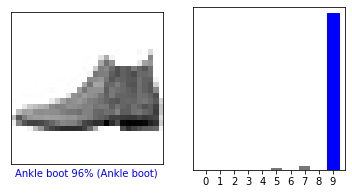

In [ ]:
i = 0
#use plot_image and plot_value_array to illustrate the prediction probability 
plt.figure(figsize=(6,3))
plt.subplot(121)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(122)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

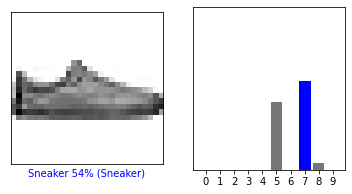

In [ ]:
i = 12
#use plot_image and plot_value_array to illustrate the prediction probability 
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()


Let's plot several images with their predictions. Note that the model can be wrong even when very confident.

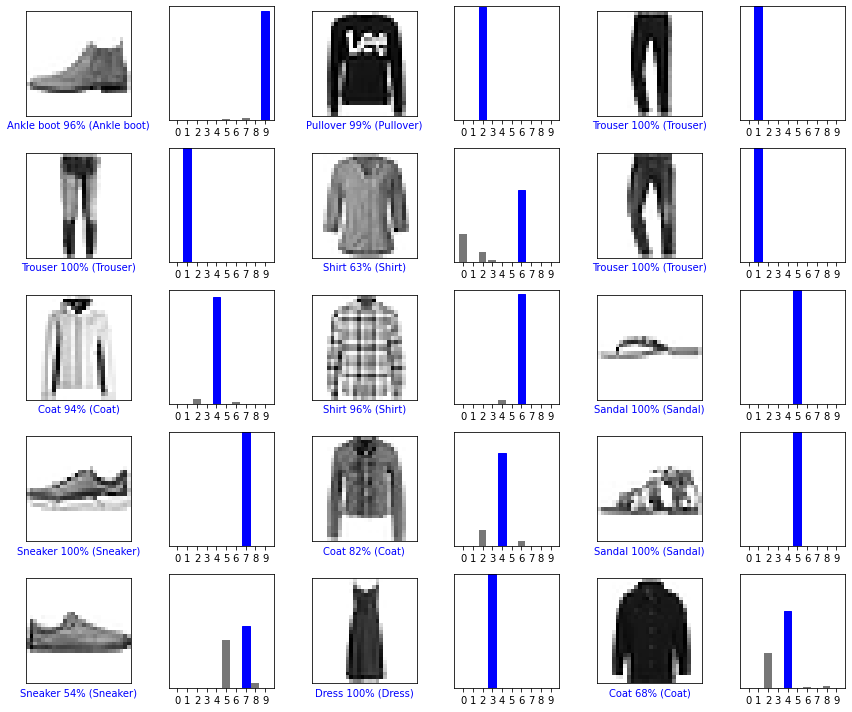

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

#Use the trained model
Finally, use the trained model to make a prediction about a single image.

In [ ]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


tf.keras models are optimized to make predictions on a batch, or collection, of examples at once. Accordingly, even though you're using a single image, you need to add it to a list:

In [ ]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


Now predict the correct label for this image:

In [ ]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 16ms/step
[[1.0640180e-05 8.6468735e-14 9.9318862e-01 3.3711594e-08 6.4043968e-04
  1.7276389e-12 6.1603463e-03 2.5700665e-17 4.1751633e-10 1.5561649e-14]]


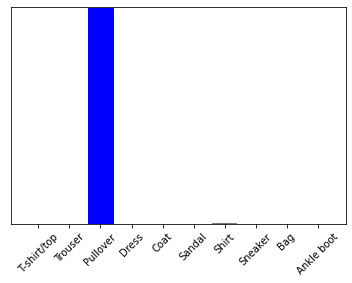

In [ ]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

tf.keras.Model.predict returns a list of lists—one list for each image in the batch of data. Grab the predictions for our (only) image in the batch:

In [ ]:
np.argmax(predictions_single[0])

2

And the model predicts a label as expected.